In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt



from sklearn import preprocessing
import warnings
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/HR_Datasetba.csv')

In [ ]:
data.sample(6)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
8324,0.67,0.78,3,235,3,0,0,0,support,low
9605,0.55,0.87,3,241,4,0,0,0,IT,low
4009,0.15,0.81,4,160,5,0,0,0,technical,medium
2548,0.69,0.50,3,208,4,0,0,0,hr,low
13946,0.89,0.77,5,232,3,0,0,0,sales,low
411,0.84,0.99,4,262,6,0,1,0,accounting,medium


In [ ]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [ ]:
data.shape

(14999, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
departments,0
salary,0


In [ ]:
data.duplicated().any()

True

In [ ]:
data[data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(11991, 10)

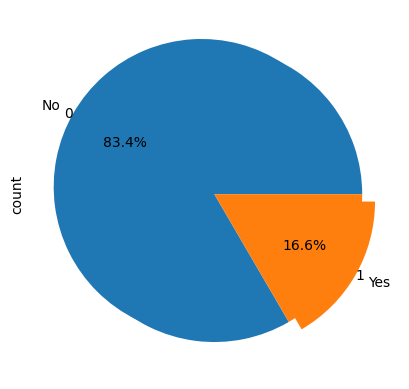

In [ ]:
data['left'].value_counts().plot(kind='pie')

pie = data.groupby('left')['left'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

In [ ]:
X = data.drop(columns=['left'])

In [ ]:
y = data['left']

In [ ]:
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
11995,0
11996,0
11997,0
11998,0


In [ ]:
data.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
9813,0.64,0.94,3,204,2,0,0,0,technical,high
11942,0.88,0.74,3,273,10,0,0,0,sales,medium
7867,0.57,0.52,4,252,2,0,0,0,marketing,low
10126,0.93,0.71,4,272,2,0,0,0,support,medium
7934,0.34,0.69,6,283,2,0,0,0,RandD,low


In [ ]:
preprocessor = ColumnTransformer(transformers=[

            ('num',StandardScaler(),['satisfaction_level',
                                     'last_evaluation',
                                     'number_project',
                                     'average_montly_hours',
                                     'time_spend_company',
                                     'Work_accident',
                                     'promotion_last_5years']),
            ('nominal',OneHotEncoder(),['departments']),
            ('ordinal',OrdinalEncoder(),['salary'])



],remainder='passthrough')

In [ ]:
pipeline = Pipeline([('preprocessor',preprocessor),
            ('model',model)])

In [ ]:
#from sklearn import set_config

In [ ]:
#set_config(display='diagram')

In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=42,stratify=y)

In [ ]:
def model_scorer(model_name,model):
  output=[]
  output.append(model_name)

  pipeline = Pipeline([('preprocessor',preprocessor),
            ('model',model)])


  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=42,stratify=y)
  pipeline.fit(X_train,y_train)

  y_pred = pipeline.predict(X_test)

  output.append(accuracy_score(y_test,y_pred))

  output.append(precision_score(y_test,y_pred))

  output.append(recall_score(y_test,y_pred))

  return output

In [ ]:
model_dict={

      'log':LogisticRegression(),
      'decision_tree':DecisionTreeClassifier(),
      'random_forest':RandomForestClassifier(),
      'XGB':XGBClassifier()
}

In [ ]:
model_Selection=[]
for model_name,model in model_dict.items():
   model_Selection.append(model_scorer(model_name,model))

In [ ]:
model_Selection

[['log', 0.8338892595063375, 0.5, 0.22389558232931728],
 ['decision_tree', 0.9664776517678453, 0.8818443804034583, 0.9216867469879518],
 ['random_forest', 0.983822548365577, 0.9817792068595927, 0.9196787148594378],
 ['XGB', 0.9818212141427618, 0.9653725078698846, 0.9236947791164659]]

In [ ]:
pipeline = Pipeline([('preprocessor',preprocessor),
            ('model',RandomForestClassifier())
              ])

In [ ]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [ ]:
df = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
583,1,1
2645,0,0
10400,0,0
8965,0,0
79,1,1
...,...,...
9953,0,0
5500,0,0
4745,0,0
3909,0,0


In [ ]:
sample = pd.DataFrame({
     'satisfaction_level':0.38,
      'last_evaluation':0.2,
      'number_project':1,
      'average_montly_hours':157,
      'time_spend_company':3,
       'Work_accident':6,
       'promotion_last_5years':0,
       'departments':'sales',
        'salary':'low'
},index=[0])

In [ ]:
result = pipeline.predict(sample)

if result == 1:
  print("An Employee may leave the organization")
else:
  print("An Employee may stay with the organization")


An Employee may leave the organization
